In [18]:
# Importanto as bibliotecas básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
# Importando módulos para machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Importanto módulos para Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, MaxPooling2D
import keras
# Importando módulos de métricas
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [8]:
class_names =['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


#Normalizando
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)

(10000, 28, 28, 1) (10000,)


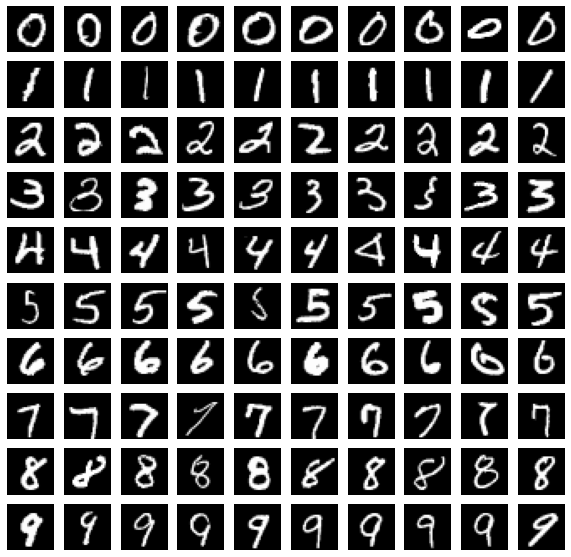

In [11]:
f, ax = plt.subplots(10,10, figsize=(10,10))
for i, class_name in enumerate(class_names):
    idxs = np.argwhere(y_train==i)
    idxs = random.choices(idxs, k=10)
    for n in range(0, 10):
        idx = idxs[n][0]
        features = X_train[idx]
        target = y_train[idx]
        img = features.reshape(28,28)
        ax[i][n].imshow(img, cmap='gray')
        ax[i,n].axis('off')
plt.axis('off')
plt.show()

In [14]:
X_train_rd = X_train.reshape(60000, -1)
X_test_rd = X_test.reshape(10000, -1)
print(X_train_rd.shape)
print()
print(X_test_rd.shape)

(60000, 784)

(10000, 784)


In [15]:
number_rf = RandomForestClassifier()

number_rf.fit(X_train_rd, y_train)

y_pred_rf = number_rf.predict(X_test_rd)

In [16]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [17]:
class_names[8]

'8'

Matriz de confusão


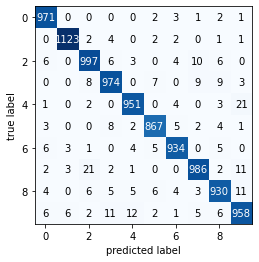

In [21]:
cm = confusion_matrix(y_test, y_pred_rf)

print("Matriz de confusão")

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [22]:
# Função para plotar a imagem
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Cria o gráfico com as probabilidades

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

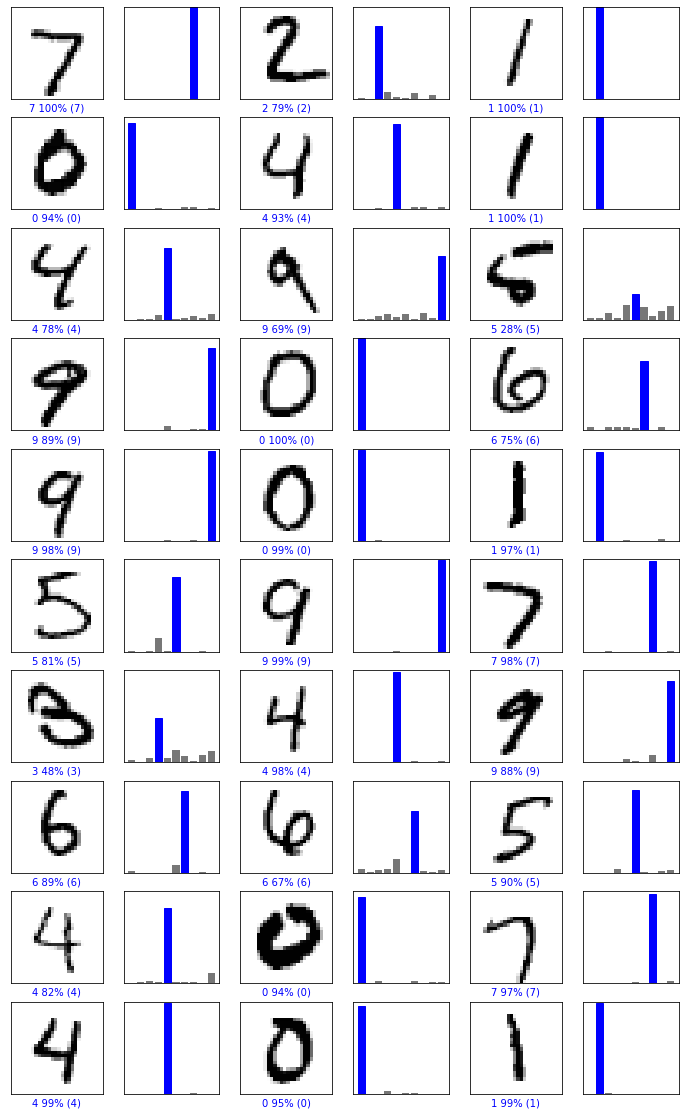

In [23]:
y_prob_rf = number_rf.predict_proba(X_test_rd)


n_rows = 10
n_cols = 3
n_images = n_rows*n_cols

plt.figure(figsize=(2*2*n_cols, 2*n_rows))
for i in range(n_images):
    plt.subplot(n_rows, 2*n_cols, 2*i+1)
    plot_image(i, y_prob_rf, y_test, X_test)
    plt.subplot(n_rows, 2*n_cols, 2*i+2)
    plot_value_array(i, y_prob_rf, y_test)
plt.show()

In [26]:
# CNN - Redes Neurais Convolucionais


X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(X_train_cnn.shape)

(60000, 28, 28, 1)


In [27]:
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_test_cnn.shape)

(10000, 28, 28, 1)


In [29]:
# Uma camada de conv, Pool, dense, output(10 neurônios)

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='Conv2D'),
    MaxPool2D((2,2), name='Max_Pool'),
    Flatten(name='Flatten'),
    Dense(100, activation='relu', name='Dense_it'),
    Dense(10, activation='softmax', name='Output_layer')
])

cnn.compile(optimizer ='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 Max_Pool (MaxPooling2D)     (None, 13, 13, 32)        0         
                                                                 
 Flatten (Flatten)           (None, 5408)              0         
                                                                 
 Dense_it (Dense)            (None, 100)               540900    
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [32]:
cnn.fit(X_train_cnn, y_train, epochs=3)

y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis = -1)

y_pred_cnn

Epoch 1/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0903 - accuracy: 0.9726
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0859 - accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0815 - accuracy: 0.9748


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.93      0.97      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

